# Exercise 10

![Exercise 10](ex10.png)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from math import *
from scipy.signal import *

In [2]:
b = [ 0.85, 0.1]
a = [ 1, -0.4, -0.05 ]
r, p, k = residue(b, a)
print("residues:", r)
print("poles:", p)
print("direct polynomial term:", k)

residues: [-0.025  0.875]
poles: [-0.1  0.5]
direct polynomial term: [0.]


$$ H(s) = \frac{0.85 s + 0.1}{s^2 - 0.4 s - 0.05} = - \frac{0.025}{s + 0.1} + \frac{0.875}{s - 0.5} $$

$$ h(t) = -0.025 \exp(-0.1 t) + 0.875 \exp(0.5 t) $$

---
# Exercise 11
![Exercise 11](ex11.png)

In [3]:
b = [ 2, -11, 12]
a = [ 1, -7, 18, -20, 8 ]
r, p, k = residue(b, a)
print("residues:", r)
print("poles:", p)
print("direct polynomial term:", k)

residues: [-3.+0.j  3.+0.j -1.+0.j -2.+0.j]
poles: [1.+0.j 2.+0.j 2.+0.j 2.+0.j]
direct polynomial term: [0.]


$$ H(s) = \frac{2 s^2 - 11 s + 12}{s^4 - 7 s^3 + 18 s^2 - 20 s + 8} =
          -\frac{3}{s-1} +\frac{3}{s-2}-\frac{1}{(s-2)^2}-\frac{2}{(s-2)^3} $$
$$ h(t) = -3e^t + 3e^{2t} -t e^{2t} -t^2 e^{2t} $$

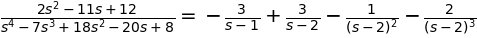

In [6]:
import sympy as sp
sp.init_printing()
s, t = sp.symbols('s t')
Hs = (2*s**2 -11*s +12) / (s**4-7*s**3+18*s**2-20*s+8)
sp.Eq(Hs, Hs.apart())

In [7]:
sp.inverse_laplace_transform(Hs.apart(), s, t)

---
# Exercise 12
![Exercise 12](ex12.png)

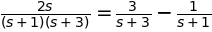

In [9]:
Hs = 2*s/(s+1)/(s+3)
sp.Eq(Hs, Hs.apart())

In [10]:
sp.inverse_laplace_transform(2*s/(s+1)/(s+3), s, t)

---
# Exercise 13
![Exercise 13](ex13.png)

In [11]:
f0 = 100 # Hertz
b = [ 2, -11, 12 ]
a = [ 1, -7, 18, -20, 8 ]

filter = lti(b, a)
filter

TransferFunctionContinuous(
array([  2., -11.,  12.]),
array([  1.,  -7.,  18., -20.,   8.]),
dt: None
)

<IPython.core.display.Javascript object>


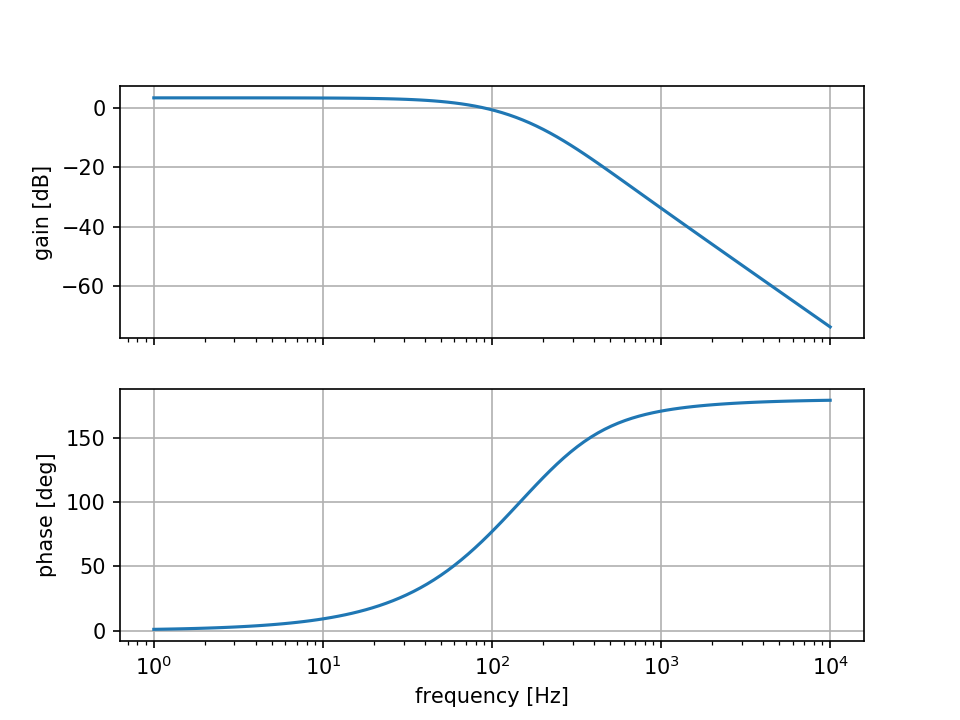

In [12]:
Omega, Gain, Phase = filter.bode()
Omega *= f0

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.semilogx(Omega, Gain)
ax1.set_ylabel('gain [dB]')
ax1.grid()
ax2.semilogx(Omega, Phase)
ax2.set_xlabel('frequency [Hz]')
ax2.set_ylabel('phase [deg]')
ax2.grid()

---